In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

Task 1: Identifying numerical and categorical variables

In [8]:
data = pd.read_csv('data/titanic.csv')
numerical, categor = data.select_dtypes(exclude='object').columns, data.select_dtypes(include='object').columns

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   name       1309 non-null   object
 3   sex        1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
dtypes: int64(4), object(10)
memory usage: 143.3+ KB


In [12]:
data.describe(exclude='object')

,pclass,survived,sibsp,parch
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.498854,0.385027
std,0.837836,0.486055,1.041658,0.865560
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000
max,3.000000,1.000000,8.000000,9.000000


In [11]:
data.describe(include='object')

,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309,1309,1309,1309,1309,1309,1309,1309,1309,1309
unique,1307,2,99,929,282,187,4,28,122,370
top,"Connolly, Miss. Kate",male,?,CA. 2343,8.05,?,S,?,?,?
freq,2,843,263,11,60,1014,914,823,1188,564


Task 2: Quantifying missing data

In [21]:
cols = ['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML','MAGFEM', 'MAGMALE']

In [22]:
data = pd.read_csv('data/cup98LRN.txt', usecols=cols)

In [26]:
data.isnull().mean()

AGE         0.248030
NUMCHLD     0.870184
INCOME      0.223096
WEALTH1     0.468830
MBCRAFT     0.553955
MBGARDEN    0.553955
MBBOOKS     0.553955
MBCOLECT    0.554584
MAGFAML     0.553955
MAGFEM      0.553955
MAGMALE     0.553955
dtype: float64

Task 3: Determining cardinality in categorical variables

In [27]:
cols = ['GENDER', 'RFA_2', 'MDMAUD_A', 'RFA_2', 'DOMAIN', 'RFA_15']

In [28]:
data = pd.read_csv('data/cup98LRN.txt', usecols=cols)

In [30]:
data.nunique()

DOMAIN      17
GENDER       7
RFA_2       14
RFA_15      34
MDMAUD_A     5
dtype: int64

Task 4: Determining cardinality in categorical variables

In [33]:
data = pd.read_csv('data/car_data.data', header=None)
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [37]:
data['class'].value_counts() / data.shape[0]

unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64

Task 5: Identifying a linear relationship

In [34]:
np.random.seed(42)
x = np.random.randn(200)

In [35]:
y = x * 10 + np.random.rand(200) * 2

In [36]:
df = pd.DataFrame({'x': x, 'y': y})

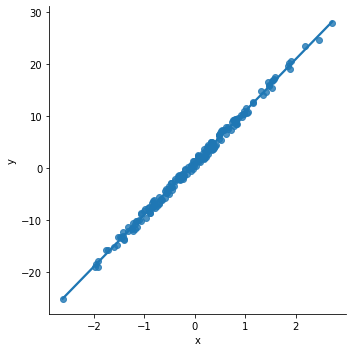

In [37]:
sns.lmplot(data=df, x='x', y='y')

In [38]:
model = LinearRegression()
model.fit(df[['x']], df['y'].values)

LinearRegression()

In [39]:
y_pred = model.predict(df[['x']])
res = df['y'] - y_pred

<AxesSubplot:xlabel='x', ylabel='y'>

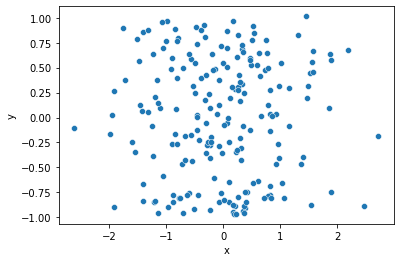

In [40]:
sns.scatterplot(y=res, x=df['x'])

/Users/lev_grafon/DS_START_ML_2/Pandas_lesson/env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

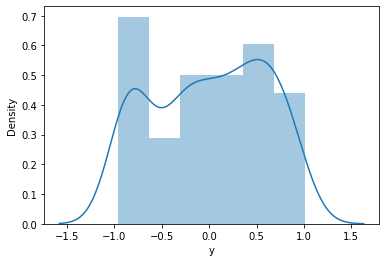

In [45]:
sns.distplot(res)

Task 6: Identifying a normal distribution

In [50]:
x = np.random.randn(200)
data = pd.DataFrame({'x': x})

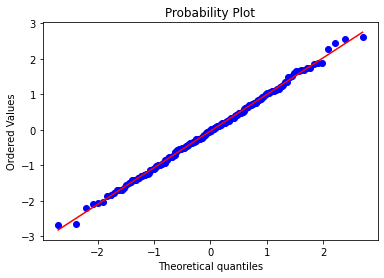

In [52]:
stats.probplot(data['x'], dist='norm', plot=plt)
plt.show()

Task 7: Distinguishing variable distribution

In [53]:
from sklearn.datasets import load_boston

data_obj = load_boston()
data = pd.DataFrame(data_obj.data, columns=data_obj.feature_names)

/Users/lev_grafon/DS_START_ML_2/Pandas_lesson/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inclu

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

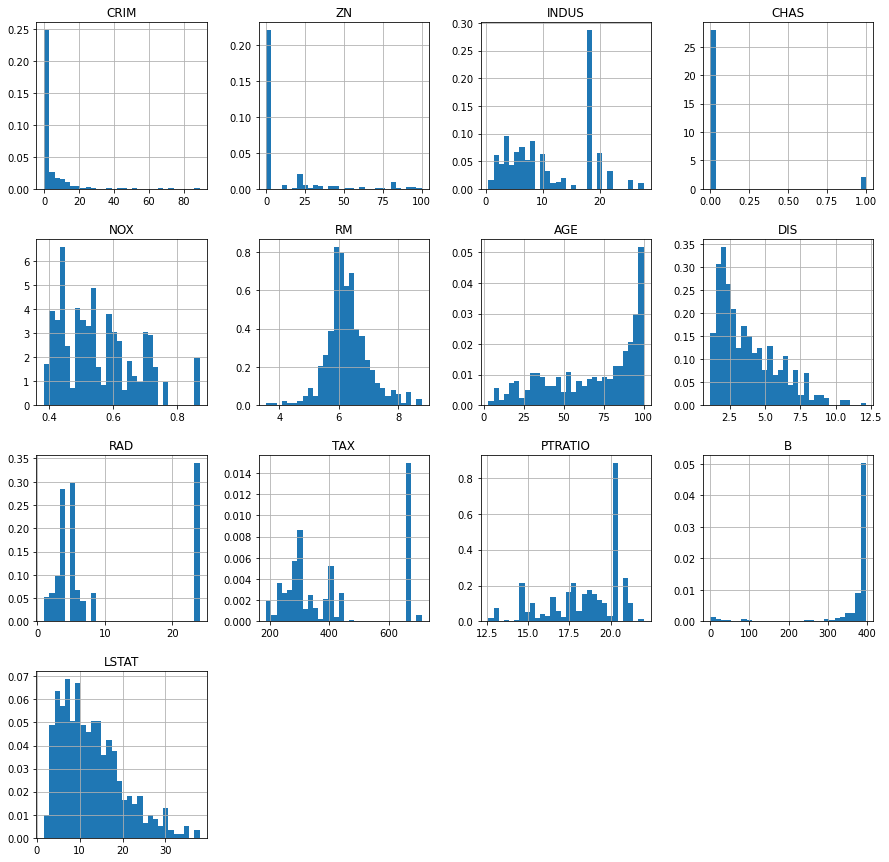

In [55]:
data.hist(bins=30, figsize=(15, 15), density=True)

Task 8: Highlighting outliers

/Users/lev_grafon/DS_START_ML_2/Pandas_lesson/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inclu

<AxesSubplot:xlabel='RM'>

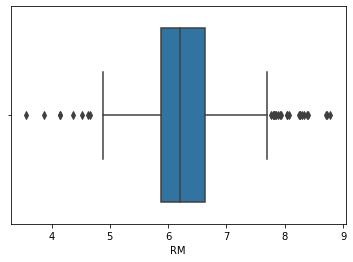

In [56]:
data_obj = load_boston()
data = pd.DataFrame(data_obj.data, columns=data_obj.feature_names)

sns.boxplot(data['RM'])

Task 8: Comparing feature magnitude

In [58]:
data.max() - data.min()

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.99690
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       36.24000
dtype: float64